# Pymaceuticals Inc.
---

### Analysis

* After taking in our data and creating a merged DataFrame with all relevant information, we found a duplicate entry (Mouse ID g989) for some rows, so we simply dropped all rows containing that data to avoid any complications.
* We then created a summary table for the different Drug Regimens in our study. We can see from this initial overview that Capomulin and Ramicane performed both the best and most consistently at reduction of Tumor volume, since these regimens have median volume in the low 40s and volume variance in the low 20s whereas all other treatments have median volume in the 50s and volume variance in the 40-60 range. The lower variance for Capomulin and Ramicane will also give us a lower standard deviation and standard error for those treatements as well.
* Then creating some plots to help visualize our data, we first see in our bar chart that Capomulin and Ramicane have significantly more timepoints taken than any other treament. This could be simply due to more of those measurements at the lab taken for those respective categories, or it could also indicate that these treaments lead to a higher survivability and the reduced timepoints for other treaments is a result of the test mice unfortunately passing away. This would conform with our previous results that showed Capomulin and Ramicane performed best in tumor volume reduction as that reduction would lead to increased survivability.
* Our next plot showed the male and female populations of our survey group. In this case, we had slightly more male mice than female mice (51% vs 49%).
* After filtering our data to only show the final tumor volume for each mouse in our dataset, we were able to generate some boxplots for treaments Capomulin, Ramicane, Infubinol, and Ceftamin. Examining these boxplots, we can see again that Capomulin and Ramicane perform comparatively to each other, but still much better than the other drug regimens. In this case, the mean final tumor size for the Infubinol and Ceftamin treatments do not even lie within the inner-quartile range for the Capomulin and Ramicane treatments, again, indicating that there is a significant difference between them. In fact, only the single outlier from Infubinol even comes close to performing as well as the Capomulin or Ramicane treatments.
* Looking at the individual progress of two different mice treated with Capomulin (l509 and m601) we can see in both cases that near the 35 day mark both mice had a sharp reduction in tumor volume from the start. For mouse l509 however, the tumor volume first increased somewhat before declining sharply whereas mouse m601 experience a fairly consistent decline in tumor volume throughout the treatment.
* Finally looking at mouse Weight vs Average Tumor Volume for mice in the Capomulin regimen, we can see that there is a upward trend in Average Tumor Volume as Weight increases. Using a Pearson's r correlation test, we obtain an r-value of 0.84 with p-value 0.00 < 0.05. We can thus reject the null hypothesis and conclude that Average Tumor Volume and mouse Weight ARE indeed correlated. We can then build a linear regression from this data yielding the best-fit line y = 0.95x + 21.55.
* In conclusion, our data here did show that the Capomulin regmien performed significantly better and more consistently at reducing tumor volume than almost all other competitors, and only compared evenly with Ramicane. The Capomulin treatment showed a noticeable reduction in tumor size in the subject mice after approximately 35 days, and further testing would be needed to investigate the effectiveness of this treatment beyond the study timeframe. Additionally, a significant correlation was found between individual mouse Weight and Average Tumor Volume for mice treated with Capomulin. Thus, further investigation into Capomulin's effect on mice of different weights could provide much further insight as well.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata,on=["Mouse ID"],how="inner")
# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
total_mice = mouse_metadata["Mouse ID"].count()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_results[study_results.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
for mouse_id in duplicates:
    dupe_df = merge_df.loc[merge_df["Mouse ID"] == mouse_id]
dupe_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df["Mouse ID"] != 'g989'].sort_values(["Timepoint","Drug Regimen","Mouse ID"]).reset_index(drop=True)
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,b742,0,45.0,0,Capomulin,Male,7,21
2,f966,0,45.0,0,Capomulin,Male,16,17
3,g288,0,45.0,0,Capomulin,Male,3,19
4,g316,0,45.0,0,Capomulin,Female,22,22


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_total = len(clean_df["Mouse ID"].unique())
clean_total

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_group = clean_df.groupby(["Drug Regimen"])

mean_volume = regimen_group["Tumor Volume (mm3)"].mean()
median_volume = regimen_group["Tumor Volume (mm3)"].median()
var_volume = regimen_group["Tumor Volume (mm3)"].var()
std_volume = regimen_group["Tumor Volume (mm3)"].std()
sem_volume = regimen_group["Tumor Volume (mm3)"].sem()

regimen_df = pd.concat([mean_volume,
                        median_volume,
                        var_volume,
                        std_volume,
                        sem_volume],axis=1,keys=["Mean Tumor Volume",
                                                 "Median Tumor Volume",
                                                 "Tumor Volume Variance",
                                                 "Tumor Volume Std. Dev.",
                                                 "Tumor Volume Std. Err."])
regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']).style.set_caption("Tumor Volume (mm3)")
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

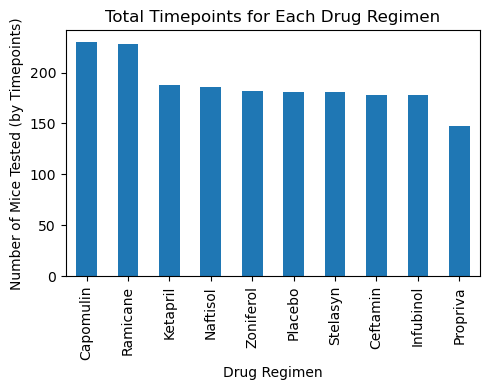

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_df = regimen_group["Timepoint"].count().sort_values(ascending=False)
plt.figure(figsize=(5,4))
bar_df.plot(kind="bar")
plt.title("Total Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested (by Timepoints)")
plt.tight_layout()
plt.show()

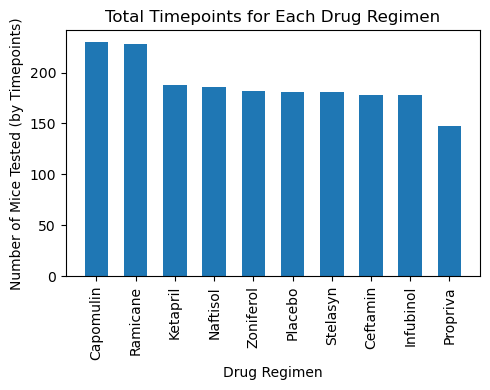

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar_df = regimen_group["Timepoint"].count().sort_values(ascending=False)
plt.figure(figsize=(5,4))
plt.bar(bar_df.index,bar_df,width=0.6)
plt.xticks(rotation="vertical")
plt.title("Total Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested (by Timepoints)")
plt.tight_layout()
plt.show()

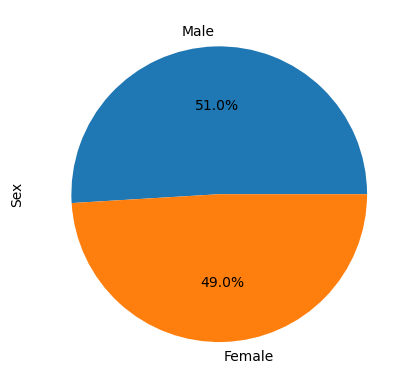

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_df["Sex"].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.show()

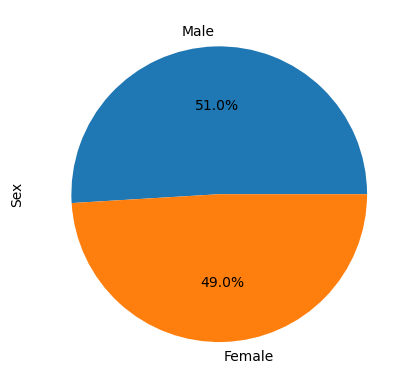

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_group = clean_df.groupby(["Sex"])
sex_df = sex_group["Mouse ID"].count().sort_values(ascending=False)
plt.pie(sex_df,labels=sex_df.index,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
id_group = clean_df.groupby(["Mouse ID"])
id_df = id_group["Timepoint"].max()
id_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_merge = pd.merge(id_df,clean_df,on=["Mouse ID","Timepoint"],how="inner")
last_timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_group_df = last_timepoint_merge.loc[last_timepoint_merge["Drug Regimen"] == treatment,["Tumor Volume (mm3)"]]
    quartiles = treatment_group_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    outliers = treatment_group_df.loc[treatment_group_df["Tumor Volume (mm3)"] < lower_bound]
    if len(outliers) > 0:
        print(f"{treatment}'s potential outliers:\n {outliers}\n")
    else:
        print(f"{treatment}'s potential outliers: None\n")
    

Capomulin's potential outliers: None

Ramicane's potential outliers: None

Infubinol's potential outliers:
     Tumor Volume (mm3)
31           36.321346

Ceftamin's potential outliers: None



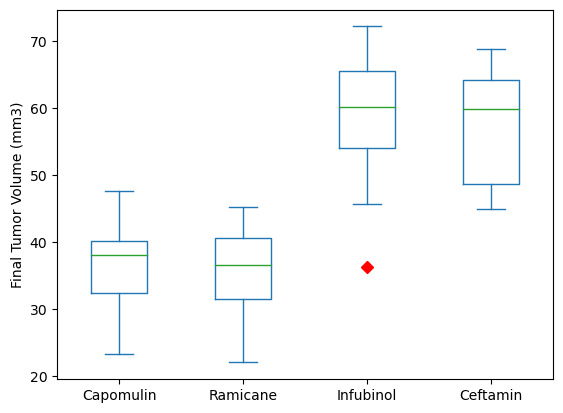

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
cap_df = last_timepoint_merge.loc[last_timepoint_merge["Drug Regimen"] == treatments[0],["Tumor Volume (mm3)"]].reset_index(drop=True)
ram_df = last_timepoint_merge.loc[last_timepoint_merge["Drug Regimen"] == treatments[1],["Tumor Volume (mm3)"]].reset_index(drop=True)
inf_df = last_timepoint_merge.loc[last_timepoint_merge["Drug Regimen"] == treatments[2],["Tumor Volume (mm3)"]].reset_index(drop=True)
cef_df = last_timepoint_merge.loc[last_timepoint_merge["Drug Regimen"] == treatments[3],["Tumor Volume (mm3)"]].reset_index(drop=True)
joined_df = cap_df[["Tumor Volume (mm3)"]]
joined_df.columns = ["Capomulin"]
joined_df["Ramicane"] = ram_df[["Tumor Volume (mm3)"]]
joined_df["Infubinol"] = inf_df[["Tumor Volume (mm3)"]]
joined_df["Ceftamin"] = cef_df[["Tumor Volume (mm3)"]]
ax = joined_df.plot(kind="box",sym="rD")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

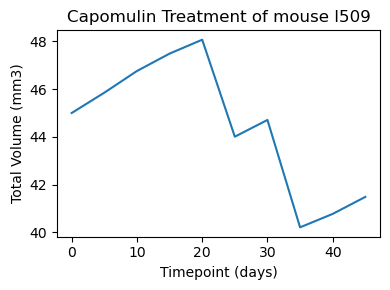

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

l509_df = clean_df.loc[clean_df["Mouse ID"] == "l509"]
plt.figure(figsize=(4,3))
plt.plot(l509_df["Timepoint"],l509_df["Tumor Volume (mm3)"])
plt.xlabel('Timepoint (days)')
plt.ylabel('Total Volume (mm3)')
plt.title('Capomulin Treatment of mouse l509')
plt.tight_layout()
plt.show()

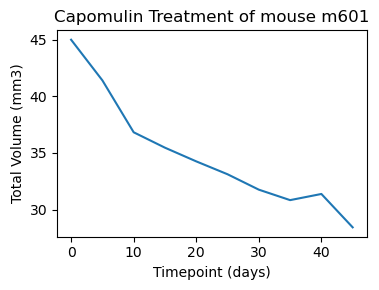

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

m601_df = clean_df.loc[clean_df["Mouse ID"] == "m601"]
plt.figure(figsize=(4,3))
plt.plot(m601_df["Timepoint"],m601_df["Tumor Volume (mm3)"])
plt.xlabel('Timepoint (days)')
plt.ylabel('Total Volume (mm3)')
plt.title('Capomulin Treatment of mouse m601')
plt.tight_layout()
plt.show()

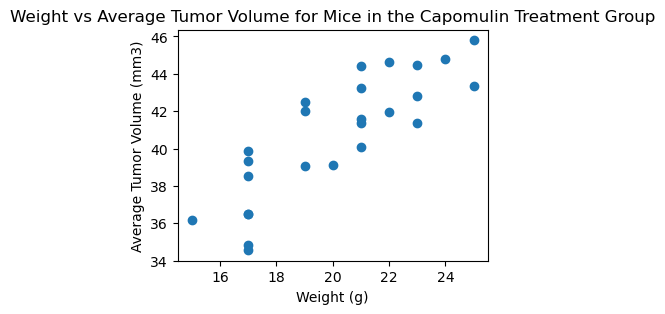

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_group = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"])
capomulin_df = capomulin_group.mean()
plt.figure(figsize=(4,3))
plt.scatter(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume for Mice in the Capomulin Treatment Group")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume (for mice in the Capomulin treatment group) is 0.84 with p-value 0.00
Null hypothesis claims data is uncorrelated: p-value less than .05 -> reject the null and data IS correlated


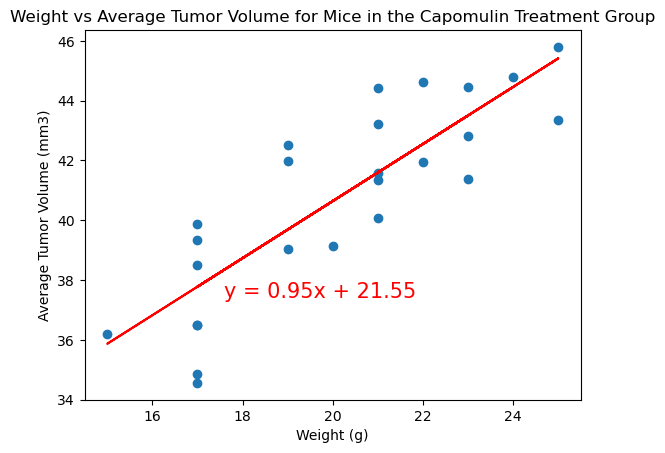

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume (for mice in the Capomulin treatment group) is {corr[0]:.2f} with p-value {corr[1]:.2f}")
if corr[1] < .05:
    print("Null hypothesis claims data is uncorrelated: p-value less than .05 -> reject the null and data IS correlated")
else:
    print("Null hypothesis claims data is uncorrelated: p-value greater than .05 -> cannot reject the null and data is NOT correlated")

xval = capomulin_df["Weight (g)"]
yval = capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xval,yval)
regress_values = xval*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xval,yval)
plt.plot(xval,regress_values,"r-")
plt.annotate(line_eq,(17.6,37.4),fontsize=15,color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume for Mice in the Capomulin Treatment Group")
plt.show()
